# Features for an amino acid 

This notebook aims to recreate the featurise component from the SeqPredNN [paper](https://doi.org/10.1186/s12859-023-05498-4) where the goal is to represent an amino acid using a coordinate system. This coordinate system will represent an amino acid by calculating the 16 nearest amino acids using the various parameters that we will dive into. And I also aim to give you some biological context (for those that need it) so that the content can be intepreted by anoyone.  

### What is an Amino Acid?

Proteins are one of the most important molecules as they facilitate cellular functionality. They are found everywhere in living organisms and can be described as the workers of the body. We wouldn't be here without them. How are proteins actually made?

Proteins are made up of 20 distinct [amino acids](https://en.wikipedia.org/wiki/Amino_acid#General_structure) in living organisms. These amino acids are the fundamental building blocks of proteins.

#### Amino Acid Molecule

An amino acid is divided into four main parts:
- **The Carboxyl Group**: $-COOH$
- **The Amino Group**: $-NH_2$
- **The Hydrogen Atom**: $-H$
- **The Side Chain (R Group)**: Varies between different amino acids

<img src="media/SeqPredNN_featurise/amino_acid.png" alt="Amino Acid Structure" style="width: 300px;"/>

All these four main parts are centered on a central carbon atom, often referred to as the alpha carbon ($C_\alpha$). The carboxyl group, amino group, hydrogen atom, and alpha carbon are present in all 20 amino acids and are often referred to as the backbone of the amino acid. However, the molecule that is associated with the side chain (R group) of the amino acid is what differentiates amino acids. For instance, a single hydrogen atom as a side chain describes the amino acid glycine.

<img src="media/SeqPredNN_featurise/glycine.png" alt="Amino Acid Structure" style="width: 300px;"/>


### Amino Acid to Protein

So the process of amino acids creating proteins is typically viewed in 4 major parts:
- **Primary Structure**
- **Secondary Structure**
- **Tertiary Structure**
- **Quaternary Structure**

For the purpose of this notebook or journal or whatever you want to call this, we will be focusing motsly on the primary structure. 

### Amino Acid to Protein Step 1: Primary Structure

The primary structure of a protein refers to a sequence of amino acids called peptide chains. So how exactly is this sequence created?

### Peptide Bond

During [protein synthesis](https://en.wikipedia.org/wiki/Protein#Synthesis), peptide bonds link amino acids together in the order specified by DNA instructions. This occurs through a reaction between two amino acids where the amino group of one amino acid bonds with the carboxyl group of another. Specifically, the nitrogen in the amino group bonds with the carbon in the carboxyl group.

<img src="media/SeqPredNN_featurise/peptide_bond.png" alt="Peptide Bond" style="width: 300px;"/>

### Dehydration Synthesis

In the process of this reaction, [dehydration synthesis](https://en.wikipedia.org/wiki/Dehydration_reaction) takes place where a water molecule is released and the **peptide bond** is formed.

<img src="media/SeqPredNN_featurise/dehydration_synthesis.png" alt="Dehydration Synthesis" style="width: 300px;"/>

### Polypeptides

Notice that as more and more amino acids are joined together with these peptide bonds, a sequence is created alongside the backbone of these amino acids. This sequence is what we call the polypeptide chain.

<img src="media/SeqPredNN_featurise/polypeptide.png" alt="Polypeptide" style="width: 300px;"/>

As this polypeptide chain is created, we typically have an amino group end and a carboxyl group end to the polypeptide. These ends can be referred to as the N-terminus and C-terminus.

For a visualisation/video of this, Check this out: [Peptide Bond Formation | Animation](https://www.youtube.com/watch?v=S6aIS2aoy9Q).

### Amino Acid to Protein Step 2 - 4

To briefly touch on the next phases, you would have the following steps which result in the final folded protein structure. 

#### Amino Acid to Protein Step 2: Secondary Structure
In this phase, the various amino acids in the polypeptide interact with each other, specifically the backbones, to form shapes such as alpha helices (α) and beta sheets (β). 

#### Amino Acid to Protein Step 3: Tertiary Structure
These alpha helices and beta sheets fold up due to various reactions, typically among the R groups of the proteins, where reactions such as disulfide bonds, hydrogen bonds, ionic bonds, and hydrophilic and hydrophobic interactions form the three-dimensional structure of a protein.

#### Amino Acid to Protein Step 4: Quaternary Structure
Sometimes, proteins can combine with other proteins to form a larger quaternary structure made of multiple proteins or polypeptides. 

<img src="media/SeqPredNN_featurise/protein_folding_process.jpg" alt="Protein folding process" style="width: 300px;"/>

### Inverse Protein Folding & SeqPredNN 

Now that you understand some biological context, let's talk about some [deep learning](https://en.wikipedia.org/wiki/Deep_learning).

#### Inverse Protein
I will make the assumption that you are familiar with [AlphaFold](https://www.nature.com/articles/s41586-021-03819-2), which is a deep learning model that attempts to solve the [protein folding problem](https://en.wikipedia.org/wiki/Protein_folding). What is the protein folding problem? Well, since we know that a protein is made up of a sequence of amino acids, we may ask ourselves the question, *can we get the final 3D structure of a protein given its sequence?* This was a very difficult problem due to all the various factors I mentioned above, but AlphaFold has managed to predict protein structures with high accuracy near [X-ray crystallographic](https://en.wikipedia.org/wiki/X-ray_crystallography) quality.

But there is the inverse question, given a 3D protein structure, can you predict its amino acid sequence (polypeptide)? Well, SeqPredNN is a deep learning model that aims to do exactly that.

#### SeqPredNN

I won't be diving too deep into how SeqPredNN [works](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-023-05498-4) (because I don't understand half of it 😂), but all you need to know is that the model takes in an input which describes an amino acid, or more specifically, the features of this amino acid. Using these various features, the model will do its magic and output a probability distribution (of all 20 amino acids) that represents what the model thinks this specific amino acid is. And it does this for all amino acids in the protein structure at every position.

<img src="media/SeqPredNN_featurise/SeqPredNN_model.png" alt="SeqPredNN model" style="width: 300px;"/>

### Polypeptide Features

Now that you have a high-level understanding of SeqPredNN (well, at least on a high level), let's dive into the main part: the features of an amino acid. Before that, I need to explain some details about polypeptides.

A polypeptide is a sequence of amino acids joined by peptide bonds, forming a backbone that links all the amino acids together. Now, let's focus on the backbone in more detail.

<img src="media/SeqPredNN_featurise/peptide_planes.png" alt="Peptide planes" style="width: 300px;"/>

The image above shows additional details, specifically introducing the idea of torsional (dihedral) angles within the polypeptide backbone.

#### Peptide Planes

In a peptide bond, the two alpha carbons (Cα), the nitrogen (N), and the carbon (C) and oxygen (O) associated with the peptide bond all lie on a single plane, called the **peptide plane.** These planes exist due to the partial double-bond character of the peptide bond. The rotation of these planes dictates the conformation of the polypeptide backbone.

#### Torsion (Dihedral) Angles

These are often referred to as torsion angles. Because of the rigid nature of the peptide plane, only two angles influence the rotation of each plane:
- **Phi (φ) angle**: Rotation of the bond before the alpha carbon.
- **Psi (ψ) angle**: Rotation of the bond after the alpha carbon.

There are other torsion angles, such as:
- **Chi (χ) angle**: Influences the rotations of the side chains (R groups).
- **Omega (ω) angle**: Rotation of the peptide bond itself, but due to its rigidity, it has minimal influence.

There are other important aspects to consider, such as [Ramachandran plots](https://en.wikipedia.org/wiki/Ramachandran_plot), [Protein Atomic Clashes](https://proteopedia.org/wiki/index.php/Clashes), and [Newman projections](https://en.wikipedia.org/wiki/Newman_projection). I encourage you to explore these topics further on your own.

For an interactive view of this, you can play around here: [Ramachandran principle and phi-psi angles](https://proteopedia.org/wiki/index.php/Tutorial:Ramachandran_principle_and_phi_psi_angles).

### Amino features: SeqPredNN's intepretation

SeqPredNN interprets the amino acids by calculating a coordinate system for each amino acid. This coordinate system represents the the 16 nearest amino acid and describes the position of each of those amino acid in the coordinate system that is centered on the alpha carbon of our current amino acid. This will be represented as an input vector of 180 numbers in the neural network.  

#### SepRedNN: Input vector

So to build on the input vector more, the first 4 numbers would be x, y, z positions of nearest amino acid. Then the next 4 would be the orientation of the residue of the nearest amino acid, basically describing how you would have to rotate the coordinate of the current amino acid system in order to get the orientation of the coordinate system of the nearest amino acid... giving you the first 8. Then there are 4 more values describing the dihedral angles in the backbone of the protein. The sine and cosine of the phi (φ) dihedral angle, and the sine and cosine of the psi (ψ) dihedral angle. This gives you a set of numbers and you would have these numbers for all 16 amino acids, giving you 180 numbers that describe the local structure around each amino acid.

So just to sum it up the features we need for each residue (amino acid) are:
- **Local Coordinate System:** Establishes local coords for each residue using N, Cα, C backbone atoms.
- **Translations:** Calculates relative x, y, z of neighbor Cα atoms in current residue's local coords.
- **Rotations:** Calculates quaternion rotations to align neighbor residue local coords with current residue's.
- **Dihedral Angles:** Extracts φ and ψ backbone dihedrals of current and neighbor residues.

So we want to create a program that will extract the features for all amino acids in a protein structure and lets get into how we can do that with the code. 

### Imports and Load the PDB File:

Protein strcutres are often stored in a pdb format so let's create a function to load a protein PDB file and import the necessary modules.

In [48]:
from Bio.PDB import PDBParser, Polypeptide, Structure
from Bio.PDB.vectors import calc_dihedral, Vector
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
import numpy as np
import os

def load_pdb(pdb_file: str) -> Structure:
    """
    Load a PDB file and return the structure.

    Args:
        pdb_file (str): Path to the PDB file.

    Returns:
        Bio.PDB.Structure.Structure: Parsed PDB structure.
    """
    parser = PDBParser(QUIET=True)
    return parser.get_structure('protein', pdb_file)

### Get residue labels

In [49]:
def get_residue_labels(structure: Bio.PDB.Structure.Structure, chain_id: str) -> np.ndarray:
    """
    Get residue labels for a specific chain in the structure.

    Args:
        structure (Bio.PDB.Structure.Structure): Parsed PDB structure.
        chain_id (str): Chain identifier.

    Returns:
        np.ndarray: Array of residue labels.
    """
    residue_labels = []
    for model in structure:
        for chain in model:
            if chain.id == chain_id:
                for residue in chain:
                    if Polypeptide.is_aa(residue, standard=True):
                        residue_labels.append(Polypeptide.three_to_index(residue.resname))
    return np.array(residue_labels)

### Establish Local Coordinate System

In [50]:
def normalize_vectors(vectors: np.ndarray) -> np.ndarray:
    """Normalize vectors to unit length."""
    return vectors / np.linalg.norm(vectors, axis=-1, keepdims=True)

def dot_product(array_a: np.ndarray, array_b: np.ndarray, keepdims: bool = True) -> np.ndarray:
    """Compute dot product of two arrays."""
    return np.sum(array_a * array_b, axis=-1, keepdims=keepdims)

def project_vectors(array_a: np.ndarray, array_b: np.ndarray, keepdims: bool = True) -> np.ndarray:
    """Project array_a onto array_b."""
    a_dot_b = dot_product(array_a, array_b, keepdims=keepdims)
    b_dot_b = dot_product(array_b, array_b, keepdims=keepdims)
    return a_dot_b / b_dot_b

def get_basis_vectors(residues: list, ca_coords: np.ndarray) -> np.ndarray:
    """
    Calculate basis vectors for each residue.

    Args:
        residues (list): List of residues.
        ca_coords (np.ndarray): Alpha carbon coordinates.

    Returns:
        np.ndarray: Basis vectors for each residue.
    """
    n_coords = np.array([residue['N'].coord for residue in residues], dtype=float).squeeze()
    c_coords = np.array([residue['C'].coord for residue in residues], dtype=float).squeeze()

    u = normalize_vectors(c_coords - n_coords)
    n_to_ca = normalize_vectors(ca_coords - n_coords)
    v = normalize_vectors(n_to_ca - project_vectors(n_to_ca, u))
    w = np.cross(u, v)
    return np.stack([u, v, w], axis=2)

### Calculate translation vectors in the local coordinate system

In [51]:
def calculate_translations(ca_coords: np.ndarray, basis_vectors: np.ndarray,
                           neighbor_indices: np.ndarray) -> np.ndarray:
    """
    Calculate translations in local coordinate systems.

    Args:
        ca_coords (np.ndarray): Alpha carbon coordinates.
        basis_vectors (np.ndarray): Basis vectors for each residue.
        neighbor_indices (np.ndarray): Indices of neighboring residues.

    Returns:
        np.ndarray: Translations in local coordinate systems.
    """
    translations = []
    for i, neighbors in enumerate(neighbor_indices):
        t_vectors = ca_coords[neighbors] - ca_coords[i]

        # Project onto each basis vector
        x_proj = np.dot(t_vectors, basis_vectors[i][:, 0]) / np.dot(basis_vectors[i][:, 0], basis_vectors[i][:, 0])
        y_proj = np.dot(t_vectors, basis_vectors[i][:, 1]) / np.dot(basis_vectors[i][:, 1], basis_vectors[i][:, 1])
        z_proj = np.dot(t_vectors, basis_vectors[i][:, 2]) / np.dot(basis_vectors[i][:, 2], basis_vectors[i][:, 2])

        t_local = np.column_stack((x_proj, y_proj, z_proj))
        translations.append(t_local)
    return np.array(translations)

### Calculate Quaternion Rotations

In [52]:
def calculate_rotations(basis_vectors: np.ndarray, neighbor_indices: np.ndarray) -> np.ndarray:
    """
    Calculate rotations between residues and their neighbors.

    Args:
        basis_vectors (np.ndarray): Basis vectors for each residue.
        neighbor_indices (np.ndarray): Indices of neighboring residues.

    Returns:
        np.ndarray: Rotations as quaternions.
    """
    rotations = []
    for i, neighbors in enumerate(neighbor_indices):
        r_matrices = np.dot(basis_vectors[neighbors], basis_vectors[i].T)
        r_quaternions = R.from_matrix(r_matrices).as_quat()
        rotations.append(r_quaternions)
    return np.array(rotations)

### Extract Dihedral Angles

In [53]:
def calculate_torsional_angles(residues: list) -> np.ndarray:
    """
    Calculate phi and psi torsional angles for residues.

    Args:
        residues (list): List of residues.

    Returns:
        np.ndarray: Array of sin and cos of phi and psi angles.
    """
    torsional_angles = []
    for i, residue in enumerate(residues):
        phi = psi = 0
        if i > 0:
            phi = calc_dihedral(
                Vector(residues[i - 1]['C'].coord),
                Vector(residue['N'].coord),
                Vector(residue['CA'].coord),
                Vector(residue['C'].coord)
            )
        if i < len(residues) - 1:
            psi = calc_dihedral(
                Vector(residue['N'].coord),
                Vector(residue['CA'].coord),
                Vector(residue['C'].coord),
                Vector(residues[i + 1]['N'].coord)
            )

        torsional_angles.append((
            [np.sin(phi), np.sin(psi)],
            [np.cos(phi), np.cos(psi)]
        ))
    return np.array(torsional_angles)

### Extracting features 

In [54]:
def calculate_features(structure: Structure.Structure, chain_id: str, neighbor_count: int) -> tuple:
    """
    Calculate structural features for a given chain.

    Args:
        structure (Structure.Structure): Parsed PDB structure.
        chain_id (str): Chain identifier.
        neighbor_count (int): Number of neighbors to consider.

    Returns:
        tuple: Translations, rotations, and torsional angles.
    """
    # Extract alpha carbon coordinates for the specified chain
    residues = [residue for chain in structure[0] if chain.id == chain_id
                for residue in chain if Polypeptide.is_aa(residue, standard=True)]
    ca_coords = np.array([residue['CA'].coord for residue in residues])

    # Compute basis vectors for each residue
    basis_vectors = get_basis_vectors(residues, ca_coords)

    # Find the indices of the nearest neighbors
    distances = np.linalg.norm(ca_coords[:, np.newaxis] - ca_coords, axis=2)
    neighbor_indices = np.argsort(distances, axis=1)[:, 1:neighbor_count + 1]

    # Calculate translations in local coordinate systems
    translations = calculate_translations(ca_coords, basis_vectors, neighbor_indices)

    # Calculate rotations for each residue's local coordinate system
    rotations = calculate_rotations(basis_vectors, neighbor_indices)

    # Calculate torsional angles for the residues
    torsional_angles = calculate_torsional_angles(residues)

    return translations, rotations, torsional_angles

### Combining it together in steps

In [64]:
def featurize(pdb_file: str, chain_id: str, neighbor_count: int) -> tuple:
    """
    Featurize a protein chain from a PDB file.

    Args:
        pdb_file (str): Path to the PDB file.
        chain_id (str): Chain identifier.
        neighbor_count (int): Number of neighbors to consider.

    Returns:
        tuple: Residue labels, translations, rotations, and torsional angles.
    """
    structure = load_pdb(pdb_file)
    translations, rotations, torsional_angles = calculate_features(structure, chain_id, neighbor_count)
    residue_labels = get_residue_labels(structure, chain_id)
    return residue_labels, translations, rotations, torsional_angles


pdb_file = 'media/SeqPredNN_featurise/1hst.pdb'
chain_id = 'A'
features = featurize(pdb_file, chain_id, 16)

print("Residue Labels:\n", features[0])
print("Translations:\n", features[1][:1])
print("Rotations:\n", features[2][:1])
print("Torsional Angles:\n", features[3][:1])

# Example features
# C:\Users\mzamo\My Drive\Documents\Important Files\Education\University\Stellenbosch\Coursework\BScHons Bioinformatics and Computational Biology\Semester 2\BScHons Research Project 2024\Project\SeqPredNN\example_features

Residue Labels:
 [15  6 12 16 19 15  3 10  7  0  0  0  7 14  0  3  8 15 14  5  5 15 15 14
 13 15  7 13  8 19  7  8 15  6 19  8 17  5  6 11  0  2  9 13  7  8  9 15
  7 14 14  9  9  0  0  5 17  9  8 13 16  8  5 17  5  0 15  5 15  4 14  9
  0  8]
Translations:
 [[[  3.65254743  -0.00304063  -0.71733432]
  [  1.2870614    0.28437994  -6.51750511]
  [  6.53238913   0.81345489   1.79368585]
  [  2.35066733   4.00575995  -6.67220985]
  [  4.74731923  -1.04700266  -6.5017924 ]
  [  7.91105732   4.38605899   2.33391937]
  [  0.33625719   6.91464808  -7.65710898]
  [  9.50981723   6.27643595  -0.51592006]
  [ 11.2360205    2.02156868  -2.188021  ]
  [  7.01093773  -2.69496539  -9.02226659]
  [ 12.28373543   2.26654933   1.54291255]
  [  9.57860257   2.03123199  -8.418177  ]
  [  6.84520483   2.57917517 -10.95752685]
  [  5.78566833   9.60345347  -7.41316231]
  [ 12.85369224   6.01198713   1.19183406]
  [  0.93066344   9.84613084 -10.08537439]]]
Rotations:
 [[[ 0.01703168  0.1764894  -0.38997437 

### Save Extracted Features

In [65]:
def save_features(features: tuple, output_dir: str, filename: str = 'features'):
    """
    Save calculated features to a file.

    Args:
        features (tuple): Residue labels, translations, rotations, and torsional angles.
        output_dir (str): Directory to save the features.
        filename (str): Name of the output file (default: 'features').
    """
    residue_labels, translations, rotations, torsional_angles = features
    output_file = os.path.join(output_dir, filename)
    np.savez(output_file,
             residue_labels=residue_labels,
             translations=translations,
             rotations=rotations,
             torsional_angles=torsional_angles)

### Bonus content: Levinthal's Paradox

You may have been wondering why we can't use various conformations to predict the final structure directly?

##### Ramachandran Plot

In 1963, an indian physicist Gopalasamudram Narayanan Ramachandran, released the concept of the [Ramachandran plot](https://doi.org/10.1016/s0022-2836(63)80023-6) for understanding peptide strucuture. The Ramachandran plot displays specific regions where an amino acid's conformation is allowed based on the phi (φ) and psi (ψ) dihedral angles. These regions are finite, indicating the conformations that are energetically favorable and physically realistic.


##### Thermodynamic Minimum Conformation

Another smart dude named Cyrus Levinthal proposed that despite the astronomical number of possible conformations... a polypeptide folds into its native structure very quickly. This phenomenon, known as [Levinthal's paradox](https://doi.org/10.1073/pnas.89.1.20), means that polypeptides do not randomly sample all possible conformations. Instead, they follow specific folding pathways, rapidly finding their thermodynamically minimum conformation.


##### Conformational Calculations

So why can't all possible conformations be sampled? Apart from the specific folding pathways and the concept of [thermodynamic minimum conformation](https://doi.org/10.1007/bf02460703), sampling all possible conformations is bsaically mathematically impossible. Here's why:

- Ramachandran plot indicates number of states an amino acid can adopt is finite.
- Assume each amino acid can adopt two different states.
- Total conformations for a sequence with $n$ amino acids: $2^n$.

For a sequence with 100 amino acids:

$$ 2^{100} \approx 1.27 \times 10^{30} \text{ conformations} $$

Now, assume we broke physics and can compute one conformation per picosecond:

- Total time required: $1.27 \times 10^{30}$ picoseconds.
- Converting picoseconds to years:

$$ 1.27 \times 10^{30} \text{ picoseconds} \times \frac{1 \text{ second}}{10^{12} \text{ picoseconds}} \times \frac{1 \text{ year}}{31,536,000 \text{ seconds}} \approx 4.02 \times 10^{10} \text{ years} $$

It would take approximately 40.2 billion years to compute all possible conformations. The sun would have made earth uninhabitable by then due to it's expansion and let's be honest, humans won't last too long (I'm not anti-human btw😅). Also, proteins are at least 8 amino acids long and assuming only 2 states per amino acid is unrealistic. In reality, the number of possible conformations is far greater, making this brute force computation even more expensive due to the exponential growth

For more details, you can refer to [Erik Lindahl's video](https://www.youtube.com/watch?v=Hswu1iakD8M).


Enter amino acid sequence: PSSNAKRQNQLHPSSAQSRSGQPQKAATCKVSSINQETIQTYCVEDTPICFSRCSSLSSLSSAEDEIGCNQTTQEADSANTLQIAEIKEKIGTRSAEDPV

Enter arbitrary states for your amino acid: 2

It would take approximately 40,196,936,841 years.


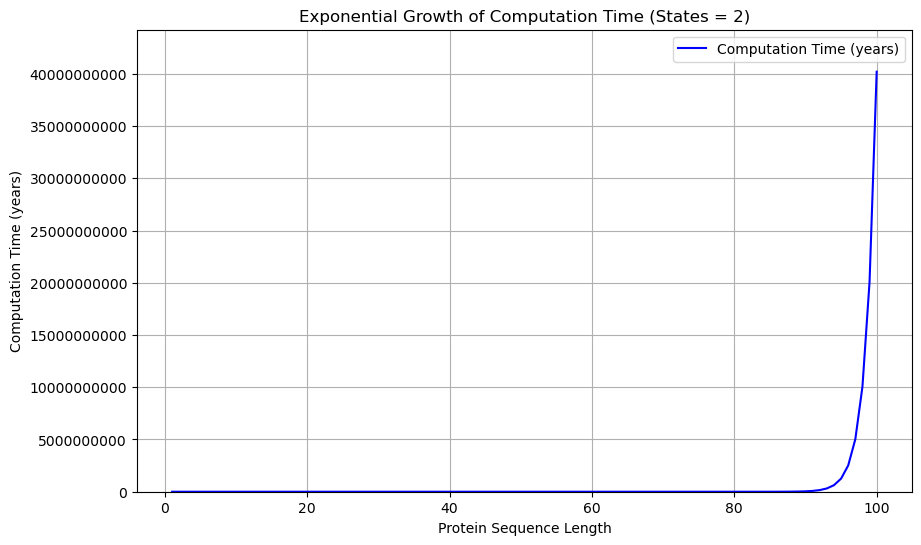

In [57]:
def calc_possible_conformations(protein_sequence: str, amino_acid_states: int):
    return amino_acid_states ** len(protein_sequence)

def conformation_computation_time_picoseconds(conformations: int):
    picoseconds = conformations
    seconds = picoseconds / 1e12
    years = seconds / 31_536_000
    return years

# Example protein sequence - PSSNAKRQNQLHPSSAQSRSGQPQKAATCKVSSINQETIQTYCVEDTPICFSRCSSLSSLSSAEDEIGCNQTTQEADSANTLQIAEIKEKIGTRSAEDPV
sequence = input("\nEnter amino acid sequence: ")
amino_acid_states = int(input("\nEnter arbitrary states for your amino acid: "))
possible_conformations = calc_possible_conformations(sequence, amino_acid_states)
compute_time = conformation_computation_time_picoseconds(possible_conformations)
print(f"\nIt would take approximately {compute_time:,.0f} years.")

# Plotting
sequence_lengths = np.arange(1, len(sequence) + 1)
conformations = [calc_possible_conformations('A' * length, amino_acid_states) for length in sequence_lengths]
computation_times = [conformation_computation_time_picoseconds(conf) for conf in conformations]

plt.figure(figsize=(10, 6))
plt.plot(sequence_lengths, computation_times, 'b-', label='Computation Time (years)')
plt.xlabel('Protein Sequence Length')
plt.ylabel('Computation Time (years)')
plt.title(f'Exponential Growth of Computation Time (States = {amino_acid_states})')
plt.ylim(0, max(computation_times) * 1.1)
plt.grid(True)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.show()